<a href="https://colab.research.google.com/github/dyounes/Fake_News_Prediction_ML_V1/blob/main/Fake_News_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake News Prediction System using Machine Learning with Python. We will be using Logistic Regression, Multinomial Naive Bayes & Passive Aggressive Classifier  model for prediction.**

**This is a Binary Classification problem**

**Is Logistic regression is the best model for such projects ??**

Dataset used is:
https://www.kaggle.com/c/fake-news

**Data Description**
train.csv: A full training dataset with the following attributes:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks the article as potentially unreliable
1: unreliable
0: reliable

**Importing the dependancies**

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [117]:
# download the stopwords in nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Pre_processing**

In [119]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/train.csv')

In [120]:
news_dataset.shape

(20800, 5)

In [121]:
# print the first 5 rows of the datafarame
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [122]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [123]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [124]:
# checking the number of missing values in the dataset
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [125]:
# merging the author name and news title 
news_dataset['content'] = news_dataset['author']+ ' '+news_dataset['title']

In [126]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [127]:
# separating the data & label

## Get the Independent Features
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [128]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [129]:
X.shape

(20800, 5)

In [130]:
Y.shape

(20800,)

In [131]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

**STEMMING:**

A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
In simple words, Stemming is the process of reducing a word to its Root word.

**EXAMPLES:**

actor, actress, acting --> act

In [132]:
porter_stem_word = PorterStemmer()


In [133]:
#  creat a function for stemming words
def func_stemming_words(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [porter_stem_word.stem(word) for word in stemmed_content 
                     if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content


In [134]:
#  first let's make a copy of original dataset to work with 
news_data = news_dataset.copy()

In [135]:
#  applied the stemming function to content dataset columns
news_data['content'] = news_data['content'].apply(func_stemming_words)

In [136]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [137]:
# separationg the data and the label
X = news_data['content'].values
Y = news_data ['label'].values

In [138]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [139]:
print(Y)

[1 0 1 ... 0 1 1]


In [140]:
Y.shape

(20800,)

In [141]:
X.shape

(20800,)

**TF-IDF stands for “Term Frequency – Inverse Document Frequency ”:**

Term Frequency : Number of time a word appears in a text document.

Inverse Document Frequency : Measure the word is a rare word or common word in a document.

In [142]:
# convert the textual data to numerical data
words_vectorizer = TfidfVectorizer()
words_vectorizer.fit(X)
X = words_vectorizer.transform(X)

In [143]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:**

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


**Train the LOGESTIC REGRESSION model:**


In [145]:
Logistic_R_model = LogisticRegression()


In [146]:
Logistic_R_model.fit(X_train, Y_train)

LogisticRegression()

**Evaluation of our model**

In [147]:
# calculate accuracy score on the training data
X_train_prediction = Logistic_R_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [148]:
print('Accuracy score of the training data', training_data_accuracy)

Accuracy score of the training data 0.9865985576923076


In [149]:
# calculate accuracy score on the test data
X_test_prediction = Logistic_R_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [150]:
print('Accuracy score of the test data', test_data_accuracy)

Accuracy score of the test data 0.9790865384615385


**CONFUSION MATRIX:**

The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label.

In [151]:
import itertools
from locale import normalize
from matplotlib import cm
def confusion_matrix_plot(cm, classes, normalize=False,
                     title='Confusion matrix',
                     cmap=plt.cm.PuBuGn):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,
                                             np.newaxis]
    print("Normalized confusion matrix")
  else:
       print("Confusion matrix, without normalization")

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]),
                                  range(cm.shape[1])):
      plt.text(j, i, cm[i, j], horizontalalignment="center",
               color='white' if cm[i, j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

accuracy with Logistic Regression:   0.979
Confusion matrix, without normalization


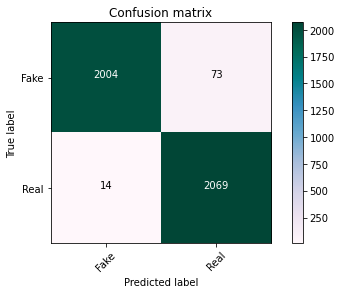

In [152]:
# calculate accuracy score on the test data and plot with confusion matrix
X_test_prediction = Logistic_R_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy with Logistic Regression:   %0.3f" % test_data_accuracy)
cm1 = metrics.confusion_matrix(Y_test, X_test_prediction)
confusion_matrix_plot(cm1, classes=['Fake', 'Real'])

In [153]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

**CLASSIFICATION MODEL : MULTINOMIAL NAIVE BAYES**

In [154]:
# implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

classifier_model_NB=MultinomialNB()

accuracy with MULTINOMIAL NAIVE BAYES:   0.950
Confusion matrix, without normalization


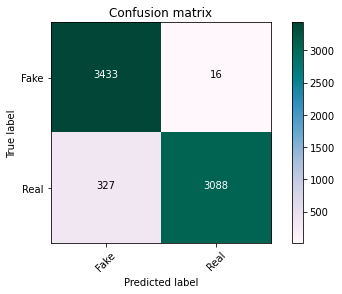

In [178]:
classifier_model_NB.fit(X1_train, Y1_train)
X1_test_prediction = classifier_model_NB.predict(X1_test)
score = metrics.accuracy_score(Y1_test, X1_test_prediction)
print("accuracy with MULTINOMIAL NAIVE BAYES:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, X1_test_prediction)
confusion_matrix_plot(cm1, classes=['Fake', 'Real'])

**CLASSIFICATION MODEL : PASSIVE AGGRESSIVE CLASSIFIER**

In [156]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy with PASSIVE AGGRESSIVE CLASSIFIER:   0.990
Confusion matrix, without normalization


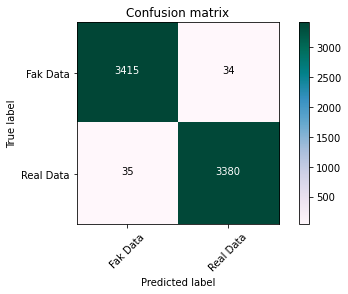

In [179]:
# implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf_PA = PassiveAggressiveClassifier(max_iter=50)

linear_clf_PA.fit(X2_train, Y2_train)
X2_test_prediction = linear_clf_PA.predict(X2_test)
score = metrics.accuracy_score(Y2_test, X2_test_prediction)
print("accuracy with PASSIVE AGGRESSIVE CLASSIFIER:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, X2_test_prediction)
confusion_matrix_plot(cm2, classes=['Fak Data', 'Real Data'])

**PREDICTIVE SYSTEM:**

In [163]:
X_news = X_test[1000]
prediction = Logistic_R_model.predict(X_news)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


In [164]:
print(Y_test[1000])

0


Building a predictive system inorder to find that the inital word in the dataset is real or fake using Multinomial Naive Bayes model:

In [187]:
X1_news = X1_test[90]

prediction1 = classifier_model_NB.predict(X1_news)
print(prediction1)

if (prediction1[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [186]:
print(Y1_test[90])

0


Building a predictive system inorder to find that the inital word in the dataset is real or fake using Passive Aggressive Classifier:


In [184]:
X2_news = X2_test[123]

prediction2 = linear_clf_PA.predict(X2_news)
print(prediction2)

if (prediction2[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [183]:
print(Y2_test[123])

0


**CLASSIFICATION REPORT:**

A Classification report is used to measure the quality of predictions from a classification algorithm.

It is used to show the precision, recall, F1 Score, and support of your trained classification model.


**Classification report for logistic regression model**

In [173]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



**Classification report for Multinomial Naive Bayes model**

In [188]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,X1_test_prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3449
           1       0.99      0.90      0.95      3415

    accuracy                           0.95      6864
   macro avg       0.95      0.95      0.95      6864
weighted avg       0.95      0.95      0.95      6864



**Classification report for Passive Aggressive Classifier model**

In [189]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test,X2_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3449
           1       0.99      0.99      0.99      3415

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



**MODEL COMPARISON**

Hence, in this dataset we can observe that we achives 

using Logistic Regression : Accuracy is 0.98

using Multinomial Naive Bayes : Accuracy is 0.95

using Passive Aggressive Classifier : Accuracy is 0.99

In [191]:
print("FINALY, ON CONCLUDE:\nSuccessfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier ")

FINALY, ON CONCLUDE:
Successfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier 
